In [1]:
#https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

# 查看資料

In [6]:
train = pd.read_csv("F:/3.Wanping/01Python/ML-Project/train.csv")
test = pd.read_csv("F:/3.Wanping/01Python/ML-Project/test.csv")
submit = pd.read_csv('F:/3.Wanping/01Python/ML-Project/gender_submission.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
data = train.append(test)
data

F:\3.Wanping\01Python\01Learningmaterials\01Materials_note\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [13]:
data.reset_index(inplace=True, drop=True)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


# 資料分析

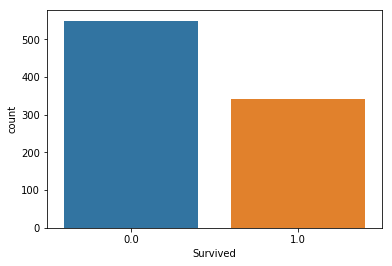

In [14]:
sns.countplot(data['Survived'])

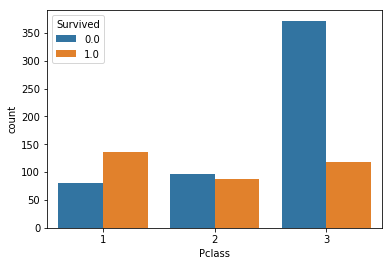

In [15]:
sns.countplot(data['Pclass'], hue=data['Survived'])

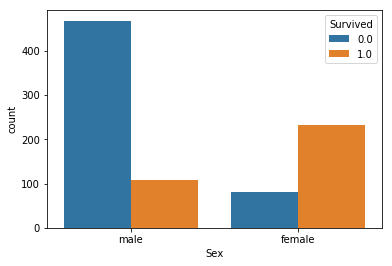

In [16]:
sns.countplot(data['Sex'], hue=data['Survived'])

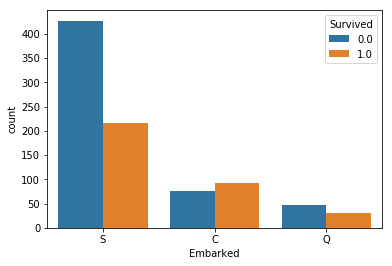

In [17]:
sns.countplot(data['Embarked'], hue=data['Survived'])

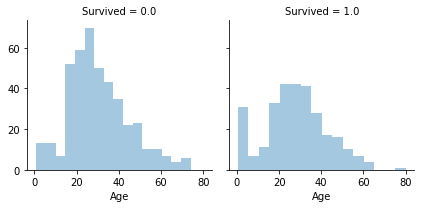

In [18]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

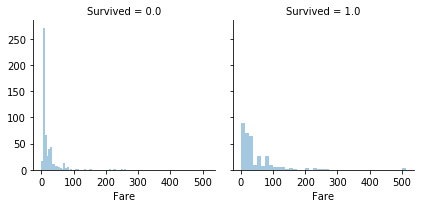

In [19]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

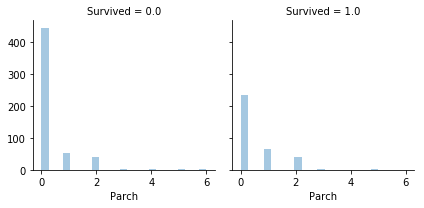

In [20]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

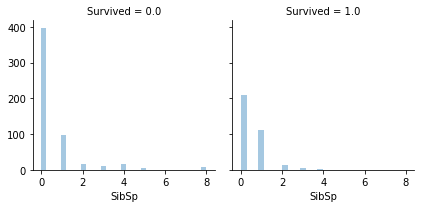

In [21]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

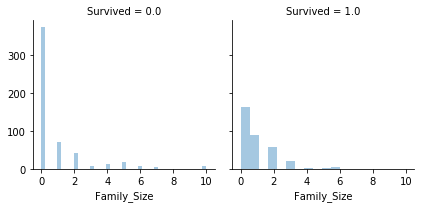

In [23]:
data['Family_Size'] = data['Parch'] + data['SibSp']
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

# 特徵工程

In [24]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Name'].str.split(", ", expand=True).head(3)
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [25]:
data['Title1'].unique()

array(['Mr. Owen Harris', 'Mrs. John Bradley (Florence Briggs Thayer)',
       'Miss. Laina', ..., 'Dona. Fermina', 'Mr. Simon Sivertsen',
       'Master. Michael J'], dtype=object)

In [26]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

In [27]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt. Edward Gifford,Col. John,Col. Oberst Alfons,Don. Manuel E,Dr. Alfred,Dr. Alice (Farnham),Dr. Arthur Jackson,Dr. Ernest,Dr. Henry William,Dr. Max,Dr. William Edward,Jonkheer. John George,"Lady. (Lucille Christiana Sutherland) (""Mrs Morgan"")",Major. Archibald Willingham,Major. Arthur Godfrey,Master. Alden Gates,Master. Andre,Master. Arthur,Master. Assad Alexander,Master. Bertram Vere,Master. Clarence Gustaf Hugo,"Master. Eden Leslie ""Neville""",Master. Edmond Roger,Master. Edvin Rojj Felix,Master. Eino Viljami,Master. Elias,Master. Eric,Master. Eugene,"Master. Frank John William ""Frankie""",Master. George Hugh,Master. George Sibley,Master. Gerios,Master. Gosta Leonard,"Master. Halim Gonios (""William George"")",Master. Harald,Master. Harold Theodor,Master. Harold Victor,Master. Henry Forbes,Master. Hudson Trevor,Master. John Morgan Jr,Master. Juha Niilo,Master. Karl Thorsten,Master. Meier,Master. Michel M,Master. Richard F,Master. Sidney Leonard,Master. Sigvard Harald Elias,Master. Thomas Henry,Master. Urho Abraham,Master. Viljo,Master. Washington,Master. William Frederick,"Master. William Loch ""William""",Master. William Rowe,Master. William Thornton II,Miss. (Marion Ogden),"Miss. Adele Kiamie ""Jane""",Miss. Agda Thorilda Viktoria,Miss. Agnes,Miss. Albina,Miss. Alice,Miss. Alice Elizabeth,Miss. Alice Phoebe,Miss. Aloisia,Miss. Amelia,"Miss. Amelia ""Mildred""",Miss. Amelie,Miss. Amy Zillah Elsie,Miss. Ann Elizabeth,Miss. Anna,"Miss. Anna ""Annie""","Miss. Anna Katherine ""Annie Kate""",Miss. Anna Kristine,Miss. Anna Sofia,Miss. Anne,Miss. Annie,Miss. Annie Clemmer,"Miss. Annie Jessie ""Nina""",Miss. Asuncion,Miss. Augusta,Miss. Augusta Charlotta,Miss. Augusta Maria,Miss. Aurora Adelia,Miss. Banoura,Miss. Bertha,Miss. Bridget,Miss. Bridget Mary,Miss. Brigdet Delia,Miss. Carla Christine Nielsine,Miss. Caroline Louise,Miss. Catharina,"Miss. Catherine Helen ""Carrie""",Miss. Clear Annie,Miss. Constance Gladys,Miss. Constance Mirium,Miss. Daisy E,Miss. Delia,"Miss. Doolina Margaret ""Daisy""","Miss. Dorothy Edith ""Dolly""",Miss. Ebba Iris Alfrida,"Miss. Edwina Celia ""Winnie""",Miss. Eleanor Ileen,Miss. Eliina,Miss. Elina,Miss. Elisabeth Walton,Miss. Elise,Miss. Elizabeth,Miss. Elizabeth Margaret,Miss. Elizabeth Mussey,Miss. Elizabeth W,Miss. Ellen,"Miss. Ellen ""Nellie""",Miss. Ellen Natalia,Miss. Ellis Anna Maria,Miss. Elsie,Miss. Elsie Edith,Miss. Emily,Miss. Emily Borie,Miss. Erna Alexandra,Miss. Ethel,Miss. Eugenie,Miss. Eva Miriam,Miss. Georgette Alexandra,Miss. Gerda Ulrika,Miss. Gladys,Miss. Gretchen Fiske,"Miss. Hanora ""Nora""","Miss. Hanora ""Norah""",Miss. Harriet R,Miss. Hedwig Margaritha,"Miss. Helen ""Ellen""",Miss. Helen Loraine,"Miss. Helen Mary ""Ellie""",Miss. Helen Monypeny,Miss. Helene Barbara,Miss. Helmina Josefina,"Miss. Henriette (""Mrs Harbeck"")",Miss. Hilda Mary,Miss. Hildur E,Miss. Hileni,Miss. Hulda Amanda Adolfina,Miss. Ida,Miss. Ida Sofia,Miss. Ingeborg Constanzia,Miss. Jamila,Miss. Jean Gertrude,Miss. Jeannie,Miss. Jessie Wills,Miss. Joan,Miss. Julie Rachel,Miss. Kate,"Miss. Kate Florence (""Mrs Kate Louise Phillips Marshall"")","Miss. Katherine ""Kate""","Miss. Katherine ""Katie""",Miss. Katie,Miss. Katriina,Miss. Kornelia Theodosia,Miss. Kristina Sofia,Miss. Laina,Miss. Laura Mabel,Miss. Lillian Amy,Miss. Lillian Gertrud,Miss. Lucile Polk,Miss. Lucy,Miss. Luise Gretchen,Miss. Lyyli Karoliina,Miss. Mabel,Miss. Mabel Helen,Miss. Madeleine,Miss. Madeleine Violet,Miss. Malake,Miss. Manca,Miss. Margaret,"Miss. Margaret ""Maggie""",Miss. Margaret Bechstein,Miss. Margaret Delia,Miss. Margaret Edith,Miss. Margaret Jane,Miss. Margareth,Miss. Margit Elizabeth,Miss. Marguerite Rut,Miss. Mari Aina,"Miss. Maria (""Mary"")",Miss. Marie Catherine,Miss. Marie Grice,Miss. Marija,Miss. Marion Elsie,Miss. Marion Louise,Miss. Marjorie,"Miss. Marjorie ""Lottie""",Miss. Mary,Miss. Mary Agatha,Miss. Mary Conover,Miss. Mary Natalie,Miss. Mathilde,Miss. Matilda,Miss. Nora A,Miss. Nourelain,Miss. Phyllis 

In [28]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt. Edward Gifford                                    70.00
Col. Archibald IV                                       53.00
Col. John                                               60.00
Col. John Jacob                                         47.00
Col. Oberst Alfons                                      56.00
Don. Manuel E                                           40.00
Dona. Fermina                                           39.00
Dr. Alfred                                              23.00
Dr. Alice (Farnham)                                     49.00
Dr. Arthur Jackson                                        NaN
Dr. Ernest                                              54.00
Dr. Henry William                                       50.00
Dr. Max                                                 32.00
Dr. Washington                                          53.00
Dr. William Edward                                      44.00
Jonkheer. John George                                   38.00
L

In [29]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1                                                Pclass
Capt. Edward Gifford                                  1         70.00
Col. Archibald IV                                     1         53.00
Col. John                                             1         60.00
Col. John Jacob                                       1         47.00
Col. Oberst Alfons                                    1         56.00
Don. Manuel E                                         1         40.00
Dona. Fermina                                         1         39.00
Dr. Alfred                                            2         23.00
Dr. Alice (Farnham)                                   1         49.00
Dr. Arthur Jackson                                    1           NaN
Dr. Ernest                                            2         54.00
Dr. Henry William                                     1         50.00
Dr. Max                                               1         32.00
Dr. Washington               

In [30]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])
data['Title2'].unique()
data.groupby('Title2')['Age'].mean()

Title2
Capt. Edward Gifford                                    70.00
Col. Archibald IV                                       53.00
Col. John                                               60.00
Col. John Jacob                                         47.00
Col. Oberst Alfons                                      56.00
Don. Manuel E                                           40.00
Dona. Fermina                                           39.00
Dr. Alfred                                              23.00
Dr. Alice (Farnham)                                     49.00
Dr. Arthur Jackson                                        NaN
Dr. Ernest                                              54.00
Dr. Henry William                                       50.00
Dr. Max                                                 32.00
Dr. Washington                                          53.00
Dr. William Edward                                      44.00
Jonkheer. John George                                   38.00
L

In [32]:
data.groupby(['Pclass'])['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [33]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2                                                Pclass
Capt. Edward Gifford                                  1         70.00
Col. Archibald IV                                     1         53.00
Col. John                                             1         60.00
Col. John Jacob                                       1         47.00
Col. Oberst Alfons                                    1         56.00
Don. Manuel E                                         1         40.00
Dona. Fermina                                         1         39.00
Dr. Alfred                                            2         23.00
Dr. Alice (Farnham)                                   1         49.00
Dr. Arthur Jackson                                    1           NaN
Dr. Ernest                                            2         54.00
Dr. Henry William                                     1         50.00
Dr. Max                                               1         32.00
Dr. Washington               

In [34]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

In [35]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r') 

Title2,Capt. Edward Gifford,Col. John,Col. Oberst Alfons,Don. Manuel E,Dr. Alfred,Dr. Alice (Farnham),Dr. Arthur Jackson,Dr. Ernest,Dr. Henry William,Dr. Max,Dr. William Edward,Jonkheer. John George,"Lady. (Lucille Christiana Sutherland) (""Mrs Morgan"")",Major. Archibald Willingham,Major. Arthur Godfrey,Master. Alden Gates,Master. Andre,Master. Arthur,Master. Assad Alexander,Master. Bertram Vere,Master. Clarence Gustaf Hugo,"Master. Eden Leslie ""Neville""",Master. Edmond Roger,Master. Edvin Rojj Felix,Master. Eino Viljami,Master. Elias,Master. Eric,Master. Eugene,"Master. Frank John William ""Frankie""",Master. George Hugh,Master. George Sibley,Master. Gerios,Master. Gosta Leonard,"Master. Halim Gonios (""William George"")",Master. Harald,Master. Harold Theodor,Master. Harold Victor,Master. Henry Forbes,Master. Hudson Trevor,Master. John Morgan Jr,Master. Juha Niilo,Master. Karl Thorsten,Master. Meier,Master. Michel M,Master. Richard F,Master. Sidney Leonard,Master. Sigvard Harald Elias,Master. Thomas Henry,Master. Urho Abraham,Master. Viljo,Master. Washington,Master. William Frederick,"Master. William Loch ""William""",Master. William Rowe,Master. William Thornton II,Miss. (Marion Ogden),"Miss. Adele Kiamie ""Jane""",Miss. Agda Thorilda Viktoria,Miss. Agnes,Miss. Albina,Miss. Alice,Miss. Alice Elizabeth,Miss. Alice Phoebe,Miss. Aloisia,Miss. Amelia,"Miss. Amelia ""Mildred""",Miss. Amelie,Miss. Amy Zillah Elsie,Miss. Ann Elizabeth,Miss. Anna,"Miss. Anna ""Annie""","Miss. Anna Katherine ""Annie Kate""",Miss. Anna Kristine,Miss. Anna Sofia,Miss. Anne,Miss. Annie,Miss. Annie Clemmer,"Miss. Annie Jessie ""Nina""",Miss. Asuncion,Miss. Augusta,Miss. Augusta Charlotta,Miss. Augusta Maria,Miss. Aurora Adelia,Miss. Banoura,Miss. Bertha,Miss. Bridget,Miss. Bridget Mary,Miss. Brigdet Delia,Miss. Carla Christine Nielsine,Miss. Caroline Louise,Miss. Catharina,"Miss. Catherine Helen ""Carrie""",Miss. Clear Annie,Miss. Constance Gladys,Miss. Constance Mirium,Miss. Daisy E,Miss. Delia,"Miss. Doolina Margaret ""Daisy""","Miss. Dorothy Edith ""Dolly""",Miss. Ebba Iris Alfrida,"Miss. Edwina Celia ""Winnie""",Miss. Eleanor Ileen,Miss. Eliina,Miss. Elina,Miss. Elisabeth Walton,Miss. Elise,Miss. Elizabeth,Miss. Elizabeth Margaret,Miss. Elizabeth Mussey,Miss. Elizabeth W,Miss. Ellen,"Miss. Ellen ""Nellie""",Miss. Ellen Natalia,Miss. Ellis Anna Maria,Miss. Elsie,Miss. Elsie Edith,Miss. Emily,Miss. Emily Borie,Miss. Erna Alexandra,Miss. Ethel,Miss. Eugenie,Miss. Eva Miriam,Miss. Georgette Alexandra,Miss. Gerda Ulrika,Miss. Gladys,Miss. Gretchen Fiske,"Miss. Hanora ""Nora""","Miss. Hanora ""Norah""",Miss. Harriet R,Miss. Hedwig Margaritha,"Miss. Helen ""Ellen""",Miss. Helen Loraine,"Miss. Helen Mary ""Ellie""",Miss. Helen Monypeny,Miss. Helene Barbara,Miss. Helmina Josefina,"Miss. Henriette (""Mrs Harbeck"")",Miss. Hilda Mary,Miss. Hildur E,Miss. Hileni,Miss. Hulda Amanda Adolfina,Miss. Ida,Miss. Ida Sofia,Miss. Ingeborg Constanzia,Miss. Jamila,Miss. Jean Gertrude,Miss. Jeannie,Miss. Jessie Wills,Miss. Joan,Miss. Julie Rachel,Miss. Kate,"Miss. Kate Florence (""Mrs Kate Louise Phillips Marshall"")","Miss. Katherine ""Kate""","Miss. Katherine ""Katie""",Miss. Katie,Miss. Katriina,Miss. Kornelia Theodosia,Miss. Kristina Sofia,Miss. Laina,Miss. Laura Mabel,Miss. Lillian Amy,Miss. Lillian Gertrud,Miss. Lucile Polk,Miss. Lucy,Miss. Luise Gretchen,Miss. Lyyli Karoliina,Miss. Mabel,Miss. Mabel Helen,Miss. Madeleine,Miss. Madeleine Violet,Miss. Malake,Miss. Manca,Miss. Margaret,"Miss. Margaret ""Maggie""",Miss. Margaret Bechstein,Miss. Margaret Delia,Miss. Margaret Edith,Miss. Margaret Jane,Miss. Margareth,Miss. Margit Elizabeth,Miss. Marguerite Rut,Miss. Mari Aina,"Miss. Maria (""Mary"")",Miss. Marie Catherine,Miss. Marie Grice,Miss. Marija,Miss. Marion Elsie,Miss. Marion Louise,Miss. Marjorie,"Miss. Marjorie ""Lottie""",Miss. Mary,Miss. Mary Agatha,Miss. Mary Conover,Miss. Mary Natalie,Miss. Mathilde,Miss. Matilda,Miss. Nora A,Miss. Nourelain,Miss. Phyllis 

In [36]:
list(data.groupby(['Title2','Pclass'])['Age'].mean().iteritems())[:3]

[(('Capt. Edward Gifford', 1), 70.0),
 (('Col. Archibald IV', 1), 53.0),
 (('Col. John', 1), 60.0)]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [39]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [40]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

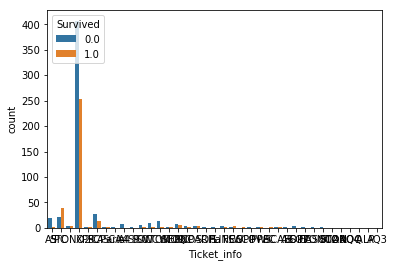

In [41]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])

# 遺失值的處理

In [42]:
#缺失值: embarked
data['Embarked'] = data['Embarked'].fillna('S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [44]:
#缺失值:Fare
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


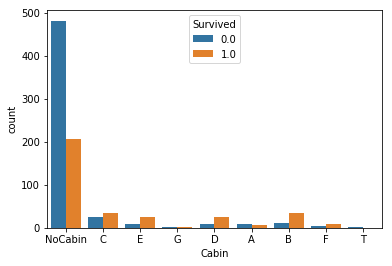

In [45]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data["Cabin"].unique()
sns.countplot(data['Cabin'], hue=data['Survived'])

In [46]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [47]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.00000,2,7.2500,2,1,1,762,2,7
264,1.0,38.00000,0,71.2833,0,0,1,1045,14,2
265,1.0,26.00000,2,7.9250,2,0,0,225,31,7
266,1.0,35.00000,2,53.1000,0,0,1,1033,36,2
267,0.0,35.00000,2,8.0500,2,1,0,918,36,7
0,0.0,44.15000,1,8.4583,2,1,0,590,36,7
268,0.0,54.00000,2,51.8625,0,1,0,882,36,4
269,0.0,2.00000,2,21.0750,2,1,4,45,36,7
270,1.0,27.00000,2,11.1333,2,0,2,1078,36,7
271,1.0,14.00000,0,30.0708,1,0,1,1075,36,7


# Training

In [48]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8272


In [49]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.263884
6,Title2,0.238128
2,Fare,0.135834
0,Age,0.111835
3,Pclass,0.081310
5,Family_Size,0.063205
8,Cabin,0.058321
7,Ticket_info,0.024717
1,Embarked,0.022765


# submit

In [51]:
rf_res =  rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [52]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
